## Image Classification
### Full custom Radial Basis Functions Implementation
    #### Exact Interpolation + Fixed Centers Selected at Random Method + Regularization
### Full custom Self Organizing Maps Implementation
###########################################################################
###  Author: Samyuel Danyo
###  Date: 03/2019
###  License: MIT License
###  Copyright (c) 2020 Samyuel Danyo
###########################################################################

In [68]:
# Python imports
import numpy as np # Matrix and vector computation package
import numpy.matlib as matlib
import matplotlib.pyplot as plt  # Plotting library
import time
# Set the seed of the numpy random number generator
np.random.seed(seed=1)
from sklearn import metrics # data and evaluation utils
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
import scipy.io

# Function Approximation with RBFN

In [2]:
def Q1_func(x):
    return 1.2*np.sin(np.pi*x) - np.cos(2.4*np.pi*x)

def noise(x):
    return 0.3*np.random.normal(0,1,x)

In [3]:
# Training Dataset
X_Train_Pts_Q1 = 40        # Training points
X_Train_Q1 = np.linspace(-1.6,1.6, X_Train_Pts_Q1).reshape(X_Train_Pts_Q1, 1)
T_Train_Q1 = Q1_func(X_Train_Q1) + noise(X_Train_Pts_Q1).reshape(X_Train_Pts_Q1, 1)

# Test Dataset
X_Test_Pts_Q1 = 320        # Test points
X_Test_Q1 = np.linspace(-1.6,1.6, X_Test_Pts_Q1).reshape(X_Test_Pts_Q1, 1)
T_Test_Q1 = Q1_func(X_Test_Q1)

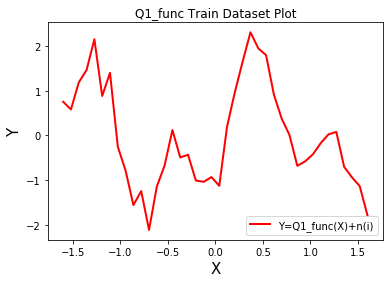

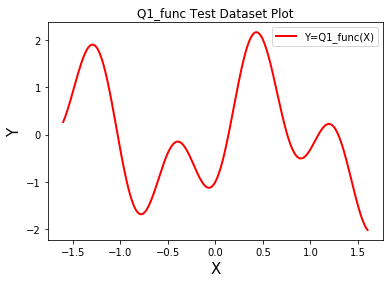

In [4]:
#Plot Q1_func
def plot_Q1_func(X, Y, title='Q1_func Plot', label='Y=Q1_func(X)'):
    plt.figure()
    plt.plot(X, Y, 'r-', linewidth=2, label=label)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.title(title)
    plt.legend()
    plt.show()
plot_Q1_func(X_Train_Q1, T_Train_Q1, title = 'Q1_func Train Dataset Plot', label='Y=Q1_func(X)+n(i)')
plot_Q1_func(X_Test_Q1, T_Test_Q1, title = 'Q1_func Test Dataset Plot', label='Y=Q1_func(X)')

## Function Approximation with RBFN - Exact Interpolation Method

In [5]:
def gaussian(X, Xi, sd):
    return np.exp(-np.sum((X - Xi)**2, axis=1)/(2*sd**2))

In [6]:
class Layer_RBFN(object):
    """Base class for the different layers.
    Defines base methods and documentation of methods."""
    
    def get_output(self):
        """Peroforms a forward step to return the output."""
        return []

class GaussianInterpolationLayer_RBFN_BASIC(Layer_RBFN):
    """The hidden layer performs a non-linear transformation to its input."""
    
    def __init__(self, n_in, n_out):
        """Initialize hidden layer centers.
        n_in is the number of input variables (features per sample).
        n_out is the number of hidden neurons (number of trianing samples).
        sd is the Gaussian Standard Deviation."""
        self.C = np.full((n_out, n_in), 0)
        self.sd = 1
    
    def train(self, X, sd):
        """Initialize the classifier fields with the training dataset."""
        self.C = X
        self.sd = sd
    
    def get_params_array(self):
        """Return array of the centers & the sd."""
        return np.array(self.C), np.asscalar(self.sd)
    
    def get_output(self, X):
        """Perform the forward step transformation."""
        return np.array([gaussian(x.reshape(1,X.shape[1]), self.C, self.sd) for x in X])
    
class LinearLayer_RBFN_BASIC(Layer_RBFN):
    """The linear layer performs a linear transformation to its input."""
    
    def __init__(self, N):
        """Initialize hidden layer parameters.
        n_in is the number of input variables (hidden nodes)."""
        self.W = np.random.randn(N, 1) * 0.1
    
    def train(self, X, T, L2_rate = 1, regularization = False):
        if regularization:
            I = np.diag(np.full((self.W.shape[0]), 1))
            self.W = np.linalg.inv(X + L2_rate*I).dot(T)
        else:
            self.W = np.linalg.inv(X).dot(T)
    
    def get_params_array(self):
        """Return arrays of the parameters."""
        return np.array(self.W)
    
    def get_output(self, X):
        """Perform the forward step linear transformation."""
        if(np.isscalar(X) or X.shape == (1,)):
            return X*self.W
        else:
            return X.dot(self.W)       
    
    def get_cost(self, Y, T):
        return (Y-T).sum()/Y.shape[0]

In [7]:
# Define the forward propagation step as a method.
def forward_step_RBFN(input_samples, layers):
    """
    Compute and return the forward activation of each layer in layers.
    Input:
        input_samples: A matrix of input samples (each row is an input vector)
        layers: A list of Layers
    Output:
        A list of activations where the activation at each index i+1 corresponds to
        the activation of layer i in layers. activations[0] contains the input samples.  
    """
    activations = [input_samples] # List of layer activations
    # Compute the forward activations for each layer starting from the first
    X = input_samples
    for layer in layers:
        Y = layer.get_output(X)  # Get the output of the current layer
        activations.append(Y)  # Store the output for future processing
        X = activations[-1]  # Set the current input as the activations of the previous layer
    return activations  # Return the activations of each layer

def train_network_RBFN_BASIC(layers, X_Train, T_Train):
    start_time = time.time()
    print("Starting Training")
    layers[0].train(X_Train, SD)
    Y = layers[0].get_output(X_Train)
    layers[1].train(Y, T_Train, L2_rate, regularization)
    activations = forward_step_RBFN(X_Train, layers)  # Get the activations
    Y = activations[-1]
    cost = layers[1].get_cost(Y, T_Train)
    end_time = time.time()
    t_time = end_time - start_time
    return layers, cost, t_time, Y

def plot_RBFN(cost, t_time):
    #Print time for training
    m, s = divmod(t_time, 60)
    h, m = divmod(m, 60)
    print("OVERALL TIME FOR TRAINING: {}h:{}m:{:.5f}s".format(h,m,s))
    print("TRAINING COST: {:.5f}".format(cost))
    
def test_network_RBFN(layers, X_Test, T_Test):
    # Get results of test data
    activations = forward_step_RBFN(X_Test, layers)  # Get activation of test samples
    Y = activations[-1]
    cost = layers[1].get_cost(Y, T_Test)
    print("TEST COST: {:.5f}".format(cost))
    return Y

In [8]:
# Define a sample model to be trained on the data
RBFN_Q1A = [] # Define a list of layers
# Add hidden layer
RBFN_Q1A.append(GaussianInterpolationLayer_RBFN_BASIC(X_Train_Q1.shape[1], X_Train_Q1.shape[0]))
# Add output layer
RBFN_Q1A.append(LinearLayer_RBFN_BASIC(X_Train_Q1.shape[0]))

print('>>>>>> RBFN_Q1A Architecture <<<<<<')
print('INPUT LAYER NODES: {}'.format(X_Train_Q1.shape[1]))
print("HIDDEN LAYER (Gaussian Interpolation) NODES: {}".format(X_Train_Q1.shape[0]))
print('OUTPUT LAYER (Lin) NODES: 1')

>>>>>> RBFN_Q1A Architecture <<<<<<
INPUT LAYER NODES: 1
HIDDEN LAYER (Gaussian Interpolation) NODES: 40
OUTPUT LAYER (Lin) NODES: 1


In [9]:
# TRAIN
regularization = False
L2_rate = 1e-10
SD = 0.1  # Standard Deviation of the Gaussian Finction

RBFN_Q1A, cost, time_t, Y_Train_Q1A = train_network_RBFN_BASIC(RBFN_Q1A, X_Train_Q1, T_Train_Q1)
plot_RBFN(cost, time_t)

Starting Training
OVERALL TIME FOR TRAINING: 0.0h:0.0m:0.00299s
TRAINING COST: -0.00000


TEST COST: -0.03934


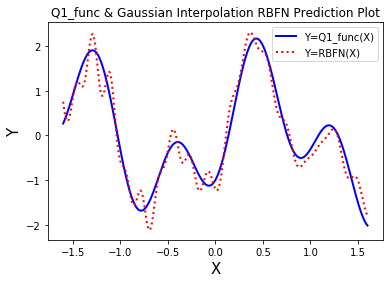

In [10]:
Y_Test_Q1A = test_network_RBFN(RBFN_Q1A, X_Test_Q1, T_Test_Q1)
plt.figure()
plt.plot(X_Test_Q1, T_Test_Q1, 'b-', linestyle='-', linewidth=2, label='Y=Q1_func(X)')
plt.plot(X_Test_Q1, Y_Test_Q1A, 'r-', linestyle=':', linewidth=2, label='Y=RBFN(X)')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title('Q1_func & Gaussian Interpolation RBFN Prediction Plot')
plt.legend()
plt.show()

## Function Approximation with RBFN - Fixed Centers Selected at Random Method

In [11]:
def gaussian(X, Xi, sd):
    return np.exp(-np.sum((X - Xi)**2, axis=1)/(2*sd**2))

def euclidean_distance(X1, X2):
        """Calculate the Euclidean distances between X1 and X2."""
        return np.sqrt(np.absolute(-2*np.dot(X1, X2.T) + np.sum(X2**2,axis=1) + np.sum(X1**2, axis=1)[:, np.newaxis]))

In [12]:
class Layer_RBFN(object):
    """Base class for the different layers.
    Defines base methods and documentation of methods."""
    
    def get_output(self):
        """Peroforms a forward step to return the output."""
        return []

class GaussianInterpolationLayer_RBFN_FCSR(Layer_RBFN):
    """The hidden layer performs a non-linear transformation to its input."""
    
    def __init__(self, n_in, n_out):
        """Initialize hidden layer centers.
        n_in is the number of input variables (features per sample).
        n_out is the number of hidden neurons (number of trianing samples).
        sd is the Gaussian Standard Deviation."""
        self.C = np.full((n_out, n_in), 0)
        self.sd = 1
    
    def train(self, X, M):
        """Initialize the classifier fields M randomly selected centers from the training dataset."""
        idx = np.random.randint(X.shape[0], size=M)
        self.C = X[idx,:]
        self.sd = np.max(euclidean_distance(self.C, self.C))/np.sqrt(2*M)
    
    def get_params_array(self):
        """Return array of the centers & the sd."""
        return np.array(self.C), np.asscalar(self.sd)
    
    def get_output(self, X):
        """Perform the forward step transformation."""
        return np.array([gaussian(x.reshape(1,X.shape[1]), self.C, self.sd) for x in X])
    
class LinearLayer_RBFN_FCSR(Layer_RBFN):
    """The linear layer performs a linear transformation to its input."""
    
    def __init__(self, N):
        """Initialize hidden layer parameters.
        n_in is the number of input variables (hidden nodes)."""
        self.W = np.random.randn(N, 1) * 0.1
        self.b = 0
    
    def train(self, X, T, L2_rate = 1, regularization = False):
        bias_inputs = np.full((X.shape[0]), 1)
        X = np.column_stack((bias_inputs, X))
        if regularization:
            I = np.diag(np.concatenate([np.array([1]), np.full((self.W.shape[0]), 1)]))
            self.W = np.linalg.inv(X.T.dot(X) + L2_rate*I).dot(X.T).dot(T)[1:]
            self.b = np.linalg.inv(X.T.dot(X) + L2_rate*I).dot(X.T).dot(T)[0]
        else:
            self.W = np.linalg.pinv(X).dot(T)[1:]
            self.b = np.linalg.pinv(X).dot(T)[0]
    
    def get_params_array(self):
        """Return arrays of the parameters."""
        return np.array(self.W), np.array(self.b)
    
    def get_output(self, X):
        """Perform the forward step linear transformation."""
        if(np.isscalar(X) or X.shape == (1,)):
            return X*self.W + self.b
        else:
            return X.dot(self.W) + self.b   
    
    def get_cost(self, Y, T):
        return (Y-T).sum()/Y.shape[0]

In [13]:
# Define the forward propagation step as a method.
def forward_step_FCSR(input_samples, layers):
    """
    Compute and return the forward activation of each layer in layers.
    Input:
        input_samples: A matrix of input samples (each row is an input vector)
        layers: A list of Layers
    Output:
        A list of activations where the activation at each index i+1 corresponds to
        the activation of layer i in layers. activations[0] contains the input samples.  
    """
    activations = [input_samples] # List of layer activations
    # Compute the forward activations for each layer starting from the first
    X = input_samples
    for layer in layers:
        Y = layer.get_output(X)  # Get the output of the current layer
        activations.append(Y)  # Store the output for future processing
        X = activations[-1]  # Set the current input as the activations of the previous layer
    return activations  # Return the activations of each layer

def train_network_RBFN_FCSR(layers, X_Train, T_Train):
    start_time = time.time()
    print("Starting Training")
    layers[0].train(X_Train, HIDDEN_M)
    Y = layers[0].get_output(X_Train)
    layers[1].train(Y, T_Train, L2_rate, regularization)
    activations = forward_step_RBFN(X_Train, layers)  # Get the activations
    Y = activations[-1]
    cost = layers[1].get_cost(Y, T_Train)
    end_time = time.time()
    t_time = end_time - start_time
    return layers, cost, t_time, Y

def plot_RBFN(cost, t_time):
    #Print time for training
    m, s = divmod(t_time, 60)
    h, m = divmod(m, 60)
    print("OVERALL TIME FOR TRAINING: {}h:{}m:{:.5f}s".format(h,m,s))
    print("TRAINING COST: {:.5f}".format(cost))
    
def test_network_RBFN(layers, X_Test, T_Test):
    # Get results of test data
    activations = forward_step_RBFN(X_Test, layers)  # Get activation of test samples
    Y = activations[-1]
    cost = layers[1].get_cost(Y, T_Test)
    print("TEST COST: {:.5f}".format(cost))
    return Y

In [14]:
# Define a sample model to be trained on the data
HIDDEN_M = 20  # Number of centers in the hidden layer
RBFN_Q1B = [] # Define a list of layers
# Add hidden layer
RBFN_Q1B.append(GaussianInterpolationLayer_RBFN_FCSR(X_Train_Q1.shape[1], HIDDEN_M))
# Add output layer
RBFN_Q1B.append(LinearLayer_RBFN_FCSR(HIDDEN_M))

print('>>>>>> RBFN_Q1B Architecture <<<<<<')
print('INPUT LAYER NODES: {}'.format(X_Train_Q1.shape[1]))
print("HIDDEN LAYER (Gaussian Fixed Centers) NODES: {}".format(HIDDEN_M))
print('OUTPUT LAYER (Lin) NODES: 1')

>>>>>> RBFN_Q1B Architecture <<<<<<
INPUT LAYER NODES: 1
HIDDEN LAYER (Gaussian Fixed Centers) NODES: 20
OUTPUT LAYER (Lin) NODES: 1


In [15]:
# TRAIN
regularization = False
L2_rate = 1 
RBFN_Q1B, cost, time_t, Y_Train_Q1B = train_network_RBFN_FCSR(RBFN_Q1B, X_Train_Q1, T_Train_Q1)
plot_RBFN(cost, time_t)

Starting Training
OVERALL TIME FOR TRAINING: 0.0h:0.0m:0.00197s
TRAINING COST: 0.00000


TEST COST: -0.03549


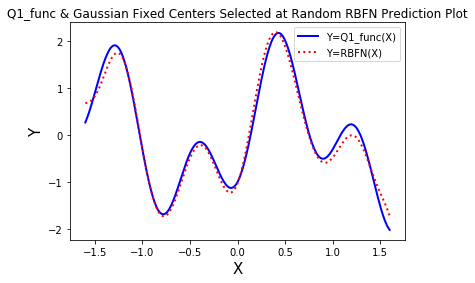

In [16]:
Y_Test_Q1B = test_network_RBFN(RBFN_Q1B, X_Test_Q1, T_Test_Q1)
plt.figure()
plt.plot(X_Test_Q1, T_Test_Q1, 'b-', linestyle='-', linewidth=2, label='Y=Q1_func(X)')
plt.plot(X_Test_Q1, Y_Test_Q1B, 'r-', linestyle=':', linewidth=2, label='Y=RBFN(X)')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title('Q1_func & Gaussian Fixed Centers Selected at Random RBFN Prediction Plot')
plt.legend()
plt.show()

## Function Approximation with RBFN - Fixed Centers Selected at Random Method +       Regularization

In [17]:
# Define a sample model to be trained on the data
HIDDEN_M = 20  # Number of centers in the hidden layer
RBFN_Q1C_FCSR = [] # Define a list of layers
# Add hidden layer
RBFN_Q1C_FCSR.append(GaussianInterpolationLayer_RBFN_FCSR(X_Train_Q1.shape[1], HIDDEN_M))
# Add output layer
RBFN_Q1C_FCSR.append(LinearLayer_RBFN_FCSR(HIDDEN_M))

print('>>>>>> RBFN_Q1C Architecture <<<<<<')
print('INPUT LAYER NODES: {}'.format(X_Train_Q1.shape[1]))
print("HIDDEN LAYER (Gaussian Fixed Centers) NODES: {}".format(HIDDEN_M))
print('OUTPUT LAYER (Lin) NODES: 1')

>>>>>> RBFN_Q1C Architecture <<<<<<
INPUT LAYER NODES: 1
HIDDEN LAYER (Gaussian Fixed Centers) NODES: 20
OUTPUT LAYER (Lin) NODES: 1


In [18]:
# TRAIN
regularization = True
L2_rate = 1e-3
RBFN_Q1C_FCSR, cost, time_t, Y_Train_Q1C_FCSR = train_network_RBFN_FCSR(RBFN_Q1C_FCSR, X_Train_Q1, T_Train_Q1)
plot_RBFN(cost, time_t)

Starting Training
OVERALL TIME FOR TRAINING: 0.0h:0.0m:0.00296s
TRAINING COST: 0.00055


TEST COST: -0.02576


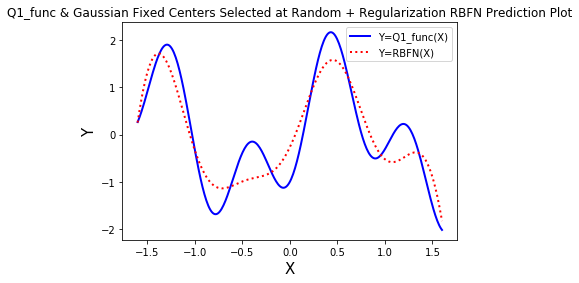

In [19]:
Y_Test_Q1C_FCSR = test_network_RBFN(RBFN_Q1C_FCSR, X_Test_Q1, T_Test_Q1)
plt.figure()
plt.plot(X_Test_Q1, T_Test_Q1, 'b-', linestyle='-', linewidth=2, label='Y=Q1_func(X)')
plt.plot(X_Test_Q1, Y_Test_Q1C_FCSR, 'r-', linestyle=':', linewidth=2, label='Y=RBFN(X)')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title('Q1_func & Gaussian Fixed Centers Selected at Random + Regularization RBFN Prediction Plot')
plt.legend()
plt.show()

In [20]:
# Define a sample model to be trained on the data
RBFN_Q1C_BASIC = [] # Define a list of layers
# Add hidden layer
RBFN_Q1C_BASIC.append(GaussianInterpolationLayer_RBFN_BASIC(X_Train_Q1.shape[1], X_Train_Q1.shape[0]))
# Add output layer
RBFN_Q1C_BASIC.append(LinearLayer_RBFN_BASIC(X_Train_Q1.shape[0]))

print('>>>>>> RBFN_Q1C Architecture <<<<<<')
print('INPUT LAYER NODES: {}'.format(X_Train_Q1.shape[1]))
print("HIDDEN LAYER (Exact Gaussian Interpolation) NODES: {}".format(X_Train_Q1.shape[0]))
print('OUTPUT LAYER (Lin) NODES: 1')

>>>>>> RBFN_Q1C Architecture <<<<<<
INPUT LAYER NODES: 1
HIDDEN LAYER (Exact Gaussian Interpolation) NODES: 40
OUTPUT LAYER (Lin) NODES: 1


In [21]:
# TRAIN
regularization = True
L2_rate = 5e-5
RBFN_Q1C_BASIC, cost, time_t, Y_Train_Q1C_BASIC = train_network_RBFN_BASIC(RBFN_Q1C_BASIC, X_Train_Q1, T_Train_Q1)
plot_RBFN(cost, time_t)

Starting Training
OVERALL TIME FOR TRAINING: 0.0h:0.0m:0.00199s
TRAINING COST: -0.00000


TEST COST: -0.03931


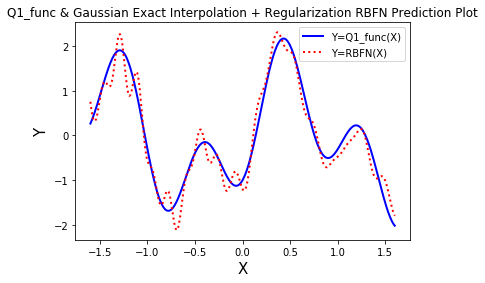

In [22]:
Y_Test_Q1C_BASIC = test_network_RBFN(RBFN_Q1C_BASIC, X_Test_Q1, T_Test_Q1)
plt.figure()
plt.plot(X_Test_Q1, T_Test_Q1, 'b-', linestyle='-', linewidth=2, label='Y=Q1_func(X)')
plt.plot(X_Test_Q1, Y_Test_Q1C_BASIC, 'r-', linestyle=':', linewidth=2, label='Y=RBFN(X)')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title('Q1_func & Gaussian Exact Interpolation + Regularization RBFN Prediction Plot')
plt.legend()
plt.show()

# Handwritten Digits Classification using RBFN

In [23]:
def get_accuracy_RBFN(Y_tr, Y_te, T_tr, T_te):
    TrAcc = np.zeros(Y_tr.shape[0])
    TeAcc = np.zeros(Y_tr.shape[0])
    thr = np.zeros(Y_tr.shape[0])
    Y_tr_Max = np.max(Y_tr)
    Y_tr_Min = np.min(Y_tr)
    Y_te_Max = np.max(Y_te)
    Y_te_Min = np.min(Y_te)
    for i in range(0, Y_tr.shape[0]):
        t = (Y_tr_Max - Y_tr_Min) * i/Y_tr.shape[0] + Y_tr_Min
        thr[i] = t
        TrAcc[i] = (np.sum(T_tr[Y_tr<t] == 0) + np.sum(T_tr[Y_tr>=t]==1)) / T_tr.shape[0] *100
        TeAcc[i] = (np.sum(T_te[Y_te<t]==0) + np.sum(T_te[Y_te>=t]==1)) / T_te.shape[0] * 100
    return TrAcc, TeAcc, thr

def get_errors_RBFN(targets, outputs, best_thr):
    error_per_sample = []
    error_per_epoch = []
    false_negatives_error = []
    false_positives_error = []
    pred = np.copy(outputs)
    pred[outputs<best_thr] = 0
    pred[outputs>=best_thr] = 1
    if(np.array(outputs).ndim == 2):
        for idx, outputs_per_epoch in enumerate(pred):
            error_per_sample.append(list(np.array(outputs_per_epoch) - np.array(targets)))
            error_per_epoch.append(sum(abs(i) for i in error_per_sample[idx])/len(error_per_sample[idx])*100) 
            false_negatives_error.append(abs(sum(i for i in error_per_sample[idx] if i < 0)))
            false_positives_error.append(sum(i for i in error_per_sample[idx] if i > 0))
    elif(np.array(outputs).ndim == 1):
        error_per_sample = (list(np.array(pred) - np.array(targets)))
        error_per_epoch = (sum(abs(i) for i in error_per_sample)/len(error_per_sample)*100) 
        false_negatives_error = (abs(sum(i for i in error_per_sample if i < 0)))
        false_positives_error = (sum(i for i in error_per_sample if i > 0))
    return error_per_epoch, false_negatives_error, false_positives_error

In [24]:
MNIST_DATASET_DICT = scipy.io.loadmat('mnist_m.mat')
X_TRAIN = np.array(MNIST_DATASET_DICT["train_data"]).T
T_TRAIN = np.array(MNIST_DATASET_DICT["train_classlabel"]).T
T_TRAIN = T_TRAIN.reshape(T_TRAIN.shape[0])
X_TEST = np.array(MNIST_DATASET_DICT["test_data"]).T
T_TEST = np.array(MNIST_DATASET_DICT["test_classlabel"]).T
T_TEST = T_TEST.reshape(T_TEST.shape[0])
MNIST_DATASET = np.column_stack((np.vstack((X_TRAIN, X_TEST)),np.hstack((T_TRAIN, T_TEST))))
print(">>>>>> MNIST DATASET FEATURE SPACE <<<<<<")
print(">>> FULL <<<")
print(np.array(MNIST_DATASET).shape)
print(">>> TRAIN <<<")
print(X_TRAIN.shape)
print(T_TRAIN.shape)
print(">>> TEST <<<")
print(X_TEST.shape)
print(T_TEST.shape)

>>>>>> MNIST DATASET FEATURE SPACE <<<<<<
>>> FULL <<<
(1250, 785)
>>> TRAIN <<<
(1000, 784)
(1000,)
>>> TEST <<<
(250, 784)
(250,)


In [25]:
# TRAIN DATASET REMOVING DIGITS 0,1,2,3,4,6
X_TRAIN_AUG = np.copy(X_TRAIN)
T_TRAIN_AUG = np.copy(T_TRAIN)
# Setting all samples from class (0,1,2,3,4,6) to (11)
X_TRAIN_AUG[T_TRAIN == 0] = 11
X_TRAIN_AUG[T_TRAIN == 1] = 11
X_TRAIN_AUG[T_TRAIN == 2] = 11
X_TRAIN_AUG[T_TRAIN == 3] = 11
X_TRAIN_AUG[T_TRAIN == 4] = 11
X_TRAIN_AUG[T_TRAIN == 6] = 11
T_TRAIN_AUG[T_TRAIN == 0] = 11
T_TRAIN_AUG[T_TRAIN == 1] = 11
T_TRAIN_AUG[T_TRAIN == 2] = 11
T_TRAIN_AUG[T_TRAIN == 3] = 11
T_TRAIN_AUG[T_TRAIN == 4] = 11
T_TRAIN_AUG[T_TRAIN == 6] = 11
# Removing all samples from class (0,1,2,3,4,6)
X_TRAIN_AUG = X_TRAIN_AUG[~np.all(X_TRAIN_AUG == 11, axis=1)]
T_TRAIN_AUG = T_TRAIN_AUG[~(T_TRAIN_AUG == 11)]

#TEST DATASET REMOVING DIGITS 0,1,2,3,4,6
X_TEST_AUG = np.copy(X_TEST)
T_TEST_AUG = np.copy(T_TEST)
X_TEST_AUG[T_TEST == 0] = 11
X_TEST_AUG[T_TEST == 1] = 11
X_TEST_AUG[T_TEST == 2] = 11
X_TEST_AUG[T_TEST == 3] = 11
X_TEST_AUG[T_TEST == 4] = 11
X_TEST_AUG[T_TEST == 6] = 11
T_TEST_AUG[T_TEST == 0] = 11
T_TEST_AUG[T_TEST == 1] = 11
T_TEST_AUG[T_TEST == 2] = 11
T_TEST_AUG[T_TEST == 3] = 11
T_TEST_AUG[T_TEST == 4] = 11
T_TEST_AUG[T_TEST == 6] = 11
# Removing all samples from class (0,1,2,3,4,6)
X_TEST_AUG = X_TEST_AUG[~np.all(X_TEST_AUG == 11, axis=1)]
T_TEST_AUG = T_TEST_AUG[~(T_TEST_AUG == 11)]
print(">>>>>> DIGITS in (0,1,2,3,4,6) REMOVED <<<<<<")

>>>>>> DIGITS in (0,1,2,3,4,6) REMOVED <<<<<<


In [26]:
#TRAIN DATASET BINARY AUGMENTATION
T_TRAIN_BINARY = np.copy(T_TRAIN_AUG)
T_TRAIN_BINARY[T_TRAIN_BINARY == 7] = 11
T_TRAIN_BINARY[T_TRAIN_BINARY == 5] = 11
T_TRAIN_BINARY[T_TRAIN_BINARY != 11] = 0
T_TRAIN_BINARY[T_TRAIN_BINARY == 11] = 1
#TEST DATASET BINARY AUGMENTATION
T_TEST_BINARY = np.copy(T_TEST_AUG)
T_TEST_BINARY[T_TEST_BINARY == 7] = 11
T_TEST_BINARY[T_TEST_BINARY == 5] = 11
T_TEST_BINARY[T_TEST_BINARY != 11] = 0
T_TEST_BINARY[T_TEST_BINARY == 11] = 1
print(">>>>>> BINARY MNIST DATASET LABELS <<<<<<")
print("DIGITS in (5,7) = 1")
print("DIGITS not in (5,7) = 0")

>>>>>> BINARY MNIST DATASET LABELS <<<<<<
DIGITS in (5,7) = 1
DIGITS not in (5,7) = 0


## MNIST Digits Classification with RBFN - Exact Interpolation Method + Regularization

In [27]:
# Define a sample model to be trained on the data
RBFN_Q2A_BASIC = [] # Define a list of layers
# Add hidden layer
RBFN_Q2A_BASIC.append(GaussianInterpolationLayer_RBFN_BASIC(X_TRAIN_AUG.shape[1], X_TRAIN_AUG.shape[0]))
# Add output layer
RBFN_Q2A_BASIC.append(LinearLayer_RBFN_BASIC(X_TRAIN_AUG.shape[0]))

print('>>>>>> RBFN_Q2A Exact Interpolation Architecture <<<<<<')
print('INPUT LAYER NODES: {}'.format(X_TRAIN_AUG.shape[1]))
print("HIDDEN LAYER (Gaussian Interpolation) NODES: {}".format(X_TRAIN_AUG.shape[0]))
print('OUTPUT LAYER (Lin) NODES: 1')

>>>>>> RBFN_Q2A Exact Interpolation Architecture <<<<<<
INPUT LAYER NODES: 784
HIDDEN LAYER (Gaussian Interpolation) NODES: 396
OUTPUT LAYER (Lin) NODES: 1


In [28]:
# TRAIN
regularization = True
L2_rate = 1e-1
SD = 100  # Standard Deviation of the Gaussian Finction

RBFN_Q2A_BASIC, cost, time_t, Y_Train_Q2A_BASIC = train_network_RBFN_BASIC(RBFN_Q2A_BASIC, X_TRAIN_AUG, T_TRAIN_BINARY)
plot_RBFN(cost, time_t)

Starting Training
OVERALL TIME FOR TRAINING: 0.0h:0.0m:1.27517s
TRAINING COST: -0.00015


TEST COST: -0.03678


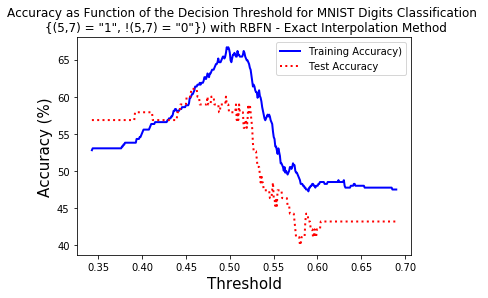

In [29]:
Y_Test_Q2A_BASIC = test_network_RBFN(RBFN_Q2A_BASIC, X_TEST_AUG, T_TEST_BINARY)
accuracy_tr, accuracy_te, thresholds = get_accuracy_RBFN(Y_Train_Q2A_BASIC, Y_Test_Q2A_BASIC, T_TRAIN_BINARY, T_TEST_BINARY)
best_thr = np.argmax(accuracy_te)

plt.figure()
plt.plot(thresholds, accuracy_tr, 'b-', linestyle='-', linewidth=2, label='Training Accuracy)')
plt.plot(thresholds, accuracy_te, 'r-', linestyle=':', linewidth=2, label='Test Accuracy')
plt.xlabel('Threshold', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
plt.title('Accuracy as Function of the Decision Threshold for MNIST Digits Classification \n {(5,7) = "1", !(5,7) = "0"}) with RBFN - Exact Interpolation Method')
plt.legend()
plt.show()

In [30]:
error_t, false_negatives_error_t, false_positives_error_t = get_errors_RBFN(T_TEST_BINARY, Y_Test_Q2A_BASIC, best_thr)
print("OPTIMAL THRESHOLD: ~ {:.3f}".format(thresholds[best_thr]))
print("TRAIN ACCURACY: {:.2f}%".format(accuracy_tr[best_thr]))
print("TEST ACCURACY: {:.2f}%".format(accuracy_te[best_thr]))
print("TEST ERROR RATE: {:.2f}%".format(error_t))
print("TEST FALSE NEGATIVES ERROR: {:.2f}%".format(false_negatives_error_t*100/X_TEST.shape[0]))
print("TEST FALSE POSITIVES ERROR: {:.2f}%".format(false_positives_error_t*100/X_TEST.shape[0]))

OPTIMAL THRESHOLD: ~ 0.456
TRAIN ACCURACY: 60.10%
TEST ACCURACY: 61.05%
TEST ERROR RATE: 56.84%
TEST FALSE NEGATIVES ERROR: 21.60%
TEST FALSE POSITIVES ERROR: 0.00%


## MNIST Digits Classification with RBFN - Fixed Centers Selected At Random Method

In [31]:
class GaussianInterpolationLayer_RBFN_FCSR(Layer_RBFN):
    """The hidden layer performs a non-linear transformation to its input."""
    
    def __init__(self, n_in, n_out):
        """Initialize hidden layer centers.
        n_in is the number of input variables (features per sample).
        n_out is the number of hidden neurons (number of trianing samples).
        sd is the Gaussian Standard Deviation."""
        self.C = np.full((n_out, n_in), 0)
        self.sd = 1
    
    def train(self, X, M):
        """Initialize the classifier fields M randomly selected centers from the training dataset."""
        idx = np.random.randint(X.shape[0], size=M)
        self.C = X[idx,:]
        self.sd = 10000#np.max(euclidean_distance(self.C, self.C))/np.sqrt(2*M)
    
    def get_params_array(self):
        """Return array of the centers & the sd."""
        return np.array(self.C), np.asscalar(self.sd)
    
    def get_output(self, X):
        """Perform the forward step transformation."""
        return np.array([gaussian(x.reshape(1,X.shape[1]), self.C, self.sd) for x in X])

In [32]:
# Define a sample model to be trained on the data
HIDDEN_M = 100  # Number of centers in the hidden layer
RBFN_Q2B_FCSR = [] # Define a list of layers
# Add hidden layer
RBFN_Q2B_FCSR.append(GaussianInterpolationLayer_RBFN_FCSR(X_TRAIN.shape[1], HIDDEN_M))
# Add output layer
RBFN_Q2B_FCSR.append(LinearLayer_RBFN_FCSR(HIDDEN_M))

print('>>>>>> RBFN_Q2B Fixed Centers Selected at Random Architecture <<<<<<')
print('INPUT LAYER NODES: {}'.format(X_TRAIN.shape[1]))
print("HIDDEN LAYER (Gaussian Interpolation) NODES: {}".format(HIDDEN_M))
print('OUTPUT LAYER (Lin) NODES: 1')

>>>>>> RBFN_Q2B Fixed Centers Selected at Random Architecture <<<<<<
INPUT LAYER NODES: 784
HIDDEN LAYER (Gaussian Interpolation) NODES: 100
OUTPUT LAYER (Lin) NODES: 1


In [39]:
# TRAIN
regularization = False
L2_rate = 1 

RBFN_Q2B_FCSR, cost, time_t, Y_Train_Q2B_FCSR = train_network_RBFN_FCSR(RBFN_Q2B_FCSR, X_TRAIN_AUG, T_TRAIN_BINARY)
plot_RBFN(cost, time_t)

Starting Training
OVERALL TIME FOR TRAINING: 0.0h:0.0m:0.06984s
TRAINING COST: -0.00000


TEST COST: -0.05039


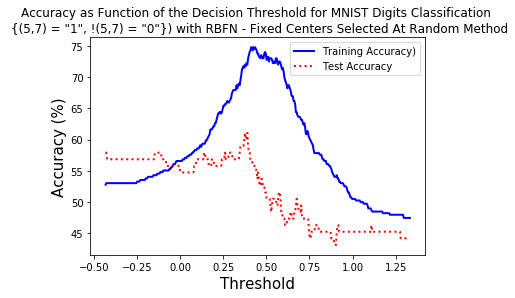

In [43]:
Y_Test_Q2B_FCSR = test_network_RBFN(RBFN_Q2B_FCSR, X_TEST_AUG, T_TEST_BINARY)
accuracy_tr, accuracy_te, thresholds = get_accuracy_RBFN(Y_Train_Q2B_FCSR, Y_Test_Q2B_FCSR, T_TRAIN_BINARY, T_TEST_BINARY)
best_thr = np.argmax(accuracy_te)

plt.figure()
plt.plot(thresholds, accuracy_tr, 'b-', linestyle='-', linewidth=2, label='Training Accuracy)')
plt.plot(thresholds, accuracy_te, 'r-', linestyle=':', linewidth=2, label='Test Accuracy')
plt.xlabel('Threshold', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
plt.title('Accuracy as Function of the Decision Threshold for MNIST Digits Classification \n {(5,7) = "1", !(5,7) = "0"}) with RBFN - Fixed Centers Selected At Random Method')
plt.legend()
plt.show()

In [44]:
error_t, false_negatives_error_t, false_positives_error_t = get_errors_RBFN(T_TEST_BINARY, Y_Test_Q2B_FCSR, best_thr)
print("OPTIMAL THRESHOLD: ~ {:.5f}".format(thresholds[best_thr]))
print("TRAIN ACCURACY: {}%".format(accuracy_tr[best_thr]))
print("TEST ACCURACY: {}%".format(accuracy_te[best_thr]))
print("TEST ERROR RATE: {:.2f}%".format(error_t))
print("TEST FALSE NEGATIVES ERROR: {:.2f}%".format(false_negatives_error_t*100/X_TEST.shape[0]))
print("TEST FALSE POSITIVES ERROR: {:.2f}%".format(false_positives_error_t*100/X_TEST.shape[0]))

OPTIMAL THRESHOLD: ~ 0.37677
TRAIN ACCURACY: 71.96969696969697%
TEST ACCURACY: 61.05263157894737%
TEST ERROR RATE: 56.84%
TEST FALSE NEGATIVES ERROR: 21.60%
TEST FALSE POSITIVES ERROR: 0.00%


## MNIST Digits Classification with RBFN - Classic K-Means Clustering Method

In [45]:
def gaussian(X, Xi, sd):
    return np.exp(-np.sum((X - Xi)**2, axis=1)/(2*sd**2))

def euclidean_distance(X1, X2):
        """Calculate the Euclidean distances between X1 and X2."""
        return np.sqrt(np.absolute(-2*np.dot(X1, X2.T) + np.sum(X2**2,axis=1) + np.sum(X1**2, axis=1)[:, np.newaxis]))

In [46]:
class Layer_RBFN(object):
    """Base class for the different layers.
    Defines base methods and documentation of methods."""
    
    def get_output(self):
        """Peroforms a forward step to return the output."""
        return []

class GaussianInterpolationLayer_RBFN_KMC(Layer_RBFN):
    """The hidden layer performs a non-linear transformation to its input."""
    
    def __init__(self, n_in, n_out):
        """Initialize hidden layer centers.
        n_in is the number of input variables (features per sample).
        n_out is the number of hidden neurons (number of centers).
        sd is the Gaussian Standard Deviation."""
        self.C = np.random.randn(n_out, n_in) * 0.1
        self.sd = 1
    
    def train(self, X, M, max_nb_itrs = 1000):
        """ Compute the classifier centers through Classic K-Means Clustering."""
        for itr in range(0, max_nb_itrs):
            C_old = np.copy(self.C)
            dists = euclidean_distance(X, self.C)
            labels = np.argmin(dists, axis=1)
            for idx in range(0,M):
                tmp = np.copy(X)
                #Setting all samples from other classes to (0)
                tmp[labels != idx] = 0
                #Removing all samples from other classes
                tmp = tmp[~np.all(tmp == 0, axis=1)]  
                #Calculating the new 'idx' center
                self.C[idx] = np.mean(tmp, axis=0)
            C_upd = np.absolute(np.sum(self.C - C_old))
            if itr%10 == 0:
                print("LAST CENTER UPDATE: {}".format(C_upd))
            if C_upd == 0:
                break
        self.sd = np.max(euclidean_distance(self.C, self.C))/np.sqrt(2*M)
    
    def get_params_array(self):
        """Return array of the centers & the sd."""
        return np.array(self.C), np.asscalar(self.sd)
    
    def get_output(self, X):
        """Perform the forward step transformation."""
        return np.array([gaussian(x.reshape(1,X.shape[1]), self.C, self.sd) for x in X])
    
class LinearLayer_RBFN_KMC(Layer_RBFN):
    """The linear layer performs a linear transformation to its input."""
    
    def __init__(self, N):
        """Initialize hidden layer parameters.
        n_in is the number of input variables (hidden nodes)."""
        self.W = np.random.randn(N, 1) * 0.1
        self.b = 0
    
    def train(self, X, T, L2_rate = 1, regularization = False):
        bias_inputs = np.full((X.shape[0]), 1)
        X = np.column_stack((bias_inputs, X))
        if regularization:
            I = np.diag(np.concatenate([np.array([1]), np.full((self.W.shape[0]), 1)]))
            self.W = np.linalg.inv(X.T.dot(X) + L2_rate*I).dot(X.T).dot(T)[1:]
            self.b = np.linalg.inv(X.T.dot(X) + L2_rate*I).dot(X.T).dot(T)[0]
        else:
            self.W = np.linalg.pinv(X).dot(T)[1:]
            self.b = np.linalg.pinv(X).dot(T)[0]
    
    def get_params_array(self):
        """Return arrays of the parameters."""
        return np.array(self.W), np.array(self.b)
    
    def get_output(self, X):
        """Perform the forward step linear transformation."""
        if(np.isscalar(X) or X.shape == (1,)):
            return X*self.W + self.b
        else:
            return X.dot(self.W) + self.b   
    
    def get_cost(self, Y, T):
        return (Y-T).sum()/Y.shape[0]

In [47]:
# Define the forward propagation step as a method.
def forward_step_KMC(input_samples, layers):
    """
    Compute and return the forward activation of each layer in layers.
    Input:
        input_samples: A matrix of input samples (each row is an input vector)
        layers: A list of Layers
    Output:
        A list of activations where the activation at each index i+1 corresponds to
        the activation of layer i in layers. activations[0] contains the input samples.  
    """
    activations = [input_samples] # List of layer activations
    # Compute the forward activations for each layer starting from the first
    X = input_samples
    for layer in layers:
        Y = layer.get_output(X)  # Get the output of the current layer
        activations.append(Y)  # Store the output for future processing
        X = activations[-1]  # Set the current input as the activations of the previous layer
    return activations  # Return the activations of each layer

def train_network_RBFN_KMC(layers, X_Train, T_Train):
    start_time = time.time()
    print("Starting Training")
    layers[0].train(X_Train, HIDDEN_M, MAX_NB_ITRS)
    Y = layers[0].get_output(X_Train)
    layers[1].train(Y, T_Train, L2_rate, regularization)
    activations = forward_step_RBFN(X_Train, layers)  # Get the activations
    Y = activations[-1]
    cost = layers[1].get_cost(Y, T_Train)
    end_time = time.time()
    t_time = end_time - start_time
    return layers, cost, t_time, Y

def plot_RBFN(cost, t_time):
    #Print time for training
    m, s = divmod(t_time, 60)
    h, m = divmod(m, 60)
    print("OVERALL TIME FOR TRAINING: {}h:{}m:{:.5f}s".format(h,m,s))
    print("TRAINING COST: {:.5f}".format(cost))
    
def test_network_RBFN(layers, X_Test, T_Test):
    # Get results of test data
    activations = forward_step_RBFN(X_Test, layers)  # Get activation of test samples
    Y = activations[-1]
    cost = layers[1].get_cost(Y, T_Test)
    print("TEST COST: {:.5f}".format(cost))
    return Y

In [48]:
# Define a sample model to be trained on the data
HIDDEN_M = 2  # Number of centers in the hidden layer
RBFN_Q2C_KMC = [] # Define a list of layers
# Add hidden layer
RBFN_Q2C_KMC.append(GaussianInterpolationLayer_RBFN_KMC(X_TRAIN.shape[1], HIDDEN_M))
# Add output layer
RBFN_Q2C_KMC.append(LinearLayer_RBFN_KMC(HIDDEN_M))

print('>>>>>> RBFN_Q2C Classic K-Means Clustering Architecture <<<<<<')
print('INPUT LAYER NODES: {}'.format(X_TRAIN.shape[1]))
print("HIDDEN LAYER (Gaussian Interpolation) NODES: {}".format(HIDDEN_M))
print('OUTPUT LAYER (Lin) NODES: 1')

>>>>>> RBFN_Q2C Classic K-Means Clustering Architecture <<<<<<
INPUT LAYER NODES: 784
HIDDEN LAYER (Gaussian Interpolation) NODES: 2
OUTPUT LAYER (Lin) NODES: 1


In [51]:
# TRAIN
regularization = False
L2_rate = 1
MAX_NB_ITRS = 200 # Max number of clusters-center updates

RBFN_Q2C_KMC, cost, time_t, Y_Train_Q2C_KMC = train_network_RBFN_FCSR(RBFN_Q2C_KMC, X_TRAIN_AUG, T_TRAIN_BINARY)
plot_RBFN(cost, time_t)

Starting Training
LAST CENTER UPDATE: 4.874955028295517
OVERALL TIME FOR TRAINING: 0.0h:0.0m:0.04189s
TRAINING COST: 0.00000


TEST COST: -0.03661


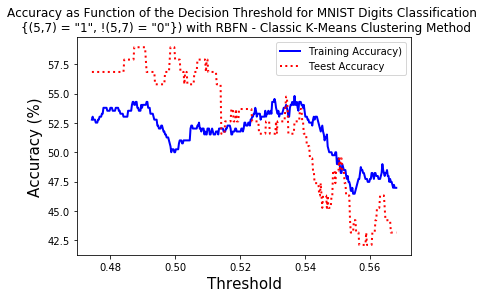

In [53]:
Y_Test_Q2C_KMC = test_network_RBFN(RBFN_Q2C_KMC, X_TEST_AUG, T_TEST_BINARY)
accuracy_tr, accuracy_te, thresholds = get_accuracy_RBFN(Y_Train_Q2C_KMC, Y_Test_Q2C_KMC, T_TRAIN_BINARY, T_TEST_BINARY)
best_thr = np.argmax(accuracy_te)

plt.figure()
plt.plot(thresholds, accuracy_tr, 'b-', linestyle='-', linewidth=2, label='Training Accuracy)')
plt.plot(thresholds, accuracy_te, 'r-', linestyle=':', linewidth=2, label='Teest Accuracy')
plt.xlabel('Threshold', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
plt.title('Accuracy as Function of the Decision Threshold for MNIST Digits Classification \n {(5,7) = "1", !(5,7) = "0"}) with RBFN - Classic K-Means Clustering Method')
plt.legend()
plt.show()

In [54]:
error_t, false_negatives_error_t, false_positives_error_t = get_errors_RBFN(T_TEST_BINARY, Y_Test_Q2C_KMC, best_thr)
print("OPTIMAL THRESHOLD: ~ {:.5f}".format(thresholds[best_thr]))
print("TRAIN ACCURACY: {}%".format(accuracy_tr[best_thr]))
print("TEST ACCURACY: {}%".format(accuracy_te[best_thr]))
print("TEST ERROR RATE: {:.2f}%".format(error_t))
print("TEST FALSE NEGATIVES ERROR: {:.2f}%".format(false_negatives_error_t*100/X_TEST.shape[0]))
print("TEST FALSE POSITIVES ERROR: {:.2f}%".format(false_positives_error_t*100/X_TEST.shape[0]))

OPTIMAL THRESHOLD: ~ 0.48734
TRAIN ACCURACY: 54.04040404040404%
TEST ACCURACY: 58.94736842105262%
TEST ERROR RATE: 56.84%
TEST FALSE NEGATIVES ERROR: 21.60%
TEST FALSE POSITIVES ERROR: 0.00%


Would You Like to See Images?
y


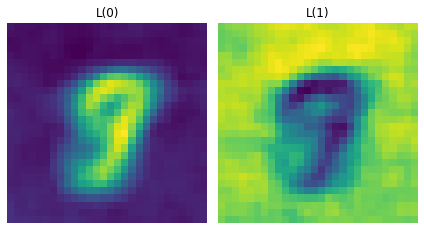

Showed You All!
Would You Like to See Images?
y


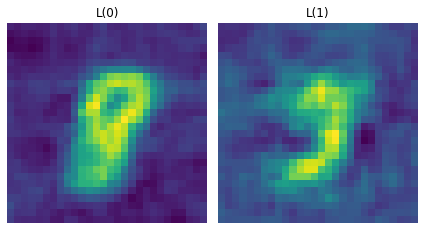

Showed You All!
CENTER 0: MEAN=0.35999, STANDARD DEVIATION=0.09127
CENTER 1: MEAN=0.57038, STANDARD DEVIATION=0.04608
CLASS 0: MEAN=0.44507, STANDARD DEVIATION=0.04129
CLASS 1: MEAN=0.46808, STANDARD DEVIATION=0.02164


In [56]:
def SHOW_IMAGES(INPUT_FEATURES, LABELS, ROW = 1, COLUMN = 2, cmap = None, flat = True):
    """
        Displays images in a configured matrix.
    Args:
        INPUT FEATURES (List[NumPy array]/NumPy array): Array of the images.
        LABELS (List/NumPy array): Array of the image labels.
        ROW (integer): Display matrix number of rows (hight).
        COLUMN (integer): Display matrix number of columns (width).
        flat (boolean): Flag for flattened images.
    """
    print("Would You Like to See Images?")
    USER_I = input()
    if(USER_I in ('yes', 'Yes', 'Y', 'y')):
        n_per_frame = ROW * COLUMN
        n_frames = len(INPUT_FEATURES)/(n_per_frame)
        if flat:
            img_size = int(np.sqrt(INPUT_FEATURES[0].shape[0]))
            
        for frame in range(int(n_frames)):
            for i in range(ROW * COLUMN):
                if flat:
                    image = np.squeeze(INPUT_FEATURES[frame*n_per_frame+i][:].reshape(img_size, img_size))
                else:
                    image = np.squeeze(INPUT_FEATURES[frame*n_per_frame+i])
                plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
                plt.imshow(image, cmap = cmap)
                plt.title('L({})'.format(LABELS[frame*n_per_frame+i]))
                plt.axis('off')  # do not show axis value
            plt.tight_layout()   # automatic padding between subplots
            plt.show()
            if frame == (n_frames - 1):
                print('Showed You All!')
                break
            print("Would You Like to See Some More?")
            USER_I = input()
            if (USER_I in ('no', 'No', 'N', 'n')):
                print("Enough is Enough I Guess!")
                break
    elif (USER_I in ('no', 'No', 'N', 'n')):
        print("Well Your Loss!")
    else: print("Did not get that, try y/n")

X_TRAIN_MEAN = np.zeros((2,784))
for idx in range(0,2):
    tmp = np.copy(X_TRAIN_AUG)
    #Setting all samples from other classes to (0)
    tmp[T_TRAIN_BINARY != idx] = 0
    #Removing all samples from other classes
    tmp = tmp[~np.all(tmp == 0, axis=1)]  
    #Calculating the new 'idx' center
    X_TRAIN_MEAN[idx] = np.mean(tmp, axis=0)

SHOW_IMAGES(RBFN_Q2C_KMC[0].C, [0,1])
SHOW_IMAGES(X_TRAIN_MEAN, [0,1])
print("CENTER 0: MEAN={:.5f}, STANDARD DEVIATION={:.5f}".format(np.mean(RBFN_Q2C_KMC[0].C[0]), np.std(RBFN_Q2C_KMC[0].C[0])))
print("CENTER 1: MEAN={:.5f}, STANDARD DEVIATION={:.5f}".format(np.mean(RBFN_Q2C_KMC[0].C[1]), np.std(RBFN_Q2C_KMC[0].C[1])))
print("CLASS 0: MEAN={:.5f}, STANDARD DEVIATION={:.5f}".format(np.mean(X_TRAIN_MEAN[0]), np.std(X_TRAIN_MEAN[0])))
print("CLASS 1: MEAN={:.5f}, STANDARD DEVIATION={:.5f}".format(np.mean(X_TRAIN_MEAN[1]), np.std(X_TRAIN_MEAN[1])))

# Self-Organizing Map (SOM)

In [57]:
def euclidean_distance(X1, X2):
        """Calculate the Euclidean distances between X1 and X2."""
        return np.sqrt(np.absolute(-2*np.dot(X1, X2.T) + np.sum(X2**2,axis=1) + np.sum(X1**2, axis=1)[:, np.newaxis]))

In [58]:
class SOMLayer(object):
    """Self Organizing Map class."""
    
    def __init__(self, M, N, n_in):
        """Initialize the SOM classifier. The centers are initialised randomly
        Args:
            n_in (int): The number of input variables (features per sample). Indicates the number of weights per neuron.
            M, N (int): The dimensions of the neuron map.
        """
        self.W = np.random.randn(M, N, n_in)
        self.N_N_Dist = self.compute_map_distances(M, N)
        self.EW_0 = np.sqrt(M**2 + N**2)/2
        
    def compute_map_distances(self, M, N):
        """ Compute the distances between aall neuron in the SOM.
            Args:
                M,N (int): The SOM dimensions. """
        map_distances = np.zeros((M, N, M, N))
        for idx_win_M in range(M):
            for idx_win_N in range(N):
                for idx_M in range(M):
                    for idx_N in range(N):
                        map_distances[idx_win_M, idx_win_N, idx_M, idx_N] =\
                        np.power(float(idx_win_M) - float(idx_M), 2) + np.power(float(idx_win_N) - float(idx_N), 2)
        return map_distances

    def get_winner_distances(self, m, n):
        """ Get the distances between a neuron & all other neurons in the SOM.
            Args:
                m,n (int): The winner neuron coordinates. """
        return self.N_N_Dist[m, n, :, :]
        
    def train(self, X, Learning_Rate_0, max_nb_itrs = 1000, verbose = False):
        """ Compute the SOM neuron weights."""
        # Calculating the time-constant controlling the effective width decay rate.
        t1 = max_nb_itrs/np.log(self.EW_0)
        # Calculating the time-constant controlling the learning rate decay rate.
        t2 = max_nb_itrs
        start_time = time.time()
        print("Starting Training")
        # TRAINING - self-organizing & convergence phase (until convergence or max nb of iterations)
        for itr in range(0, max_nb_itrs):
            W_old = np.copy(self.W)
            # Step 1 - randomly selecting an input vector
            idx = np.random.randint(X.shape[0], size=1)
            # Step 2 - competitive process: Finding the closest(winner) neuron to the input vector
            dists_X_N = np.zeros((self.W.shape[0], self.W.shape[1]))
            for idx_m, m in enumerate(self.W):
                for idx_n, n in enumerate(m):
                    dists_X_N[idx_m][idx_n] = np.asscalar(euclidean_distance(X[idx].reshape(1, X.shape[1]), n.reshape(1, self.W.shape[2])))
            label_closest_m = int(np.modf(np.argmin(dists_X_N)/self.W.shape[1])[1])
            label_closest_n = np.argmin(dists_X_N) - label_closest_m*self.W.shape[1]
            # Step 3A - Get the distances between the winner neuron and all neurons in the map                                      
            dists_W_N = self.get_winner_distances(label_closest_m, label_closest_n)
            # Step 3B - Calculating the time-varying components
            Effective_Width = self.EW_0*np.exp(-itr/t1)
            Neighborhood_Function = np.exp(-(dists_W_N**2) / (2*Effective_Width**2))
            Learning_Rate = np.max((Learning_Rate_0*np.exp(-itr/t2), 0.01))
            # Step 3C - Updating the weights - new weight is the weighted average of the input and the current weight! It moves towards the input vector.
            for idx_m, m in enumerate(self.W):
                for idx_n, n in enumerate(m):
                    self.W[idx_m][idx_n] = n + Learning_Rate*Neighborhood_Function[idx_m][idx_n]*(X[idx] - n)
            # Step 4 - Check for convergence or iteration threshold.
            W_upd = np.absolute(np.sum(self.W - W_old))
            if verbose and X.shape[1] == 2 and (itr%int(max_nb_itrs*0.1)) == 0:
                print("ITERATION: {}".format(itr))
                plot_SOM(self.W, X)
            elif verbose and X.shape[1] > 2 and (itr%int(max_nb_itrs*0.1)) == 0:
                SOM_W, W_X_SOM, W_T_SOM = self.get_winners(X)
                print("ITERATION: {}".format(itr))
                plot_SOM_LAB(W_T_SOM)
            if (itr%int(max_nb_itrs*0.1)) == 0:
                print("ITERATION: {} WEIGHTS UPDATE: {}".format(itr, W_upd))
        print("MAX NUMBER OF ITERATIONS REACHED!")
        end_time = time.time()
        return end_time - start_time
    
    def get_params_array(self):
        """Return array of the centers & the sd."""
        return np.array(self.W), np.asscalar(self.EW_0)
    
    def get_mapping(self, X):
        """Classify the input samples according to the map of the neurons.
            Args:
                X (NumPy Array.shape(P,K)): Input samples.
            Returns:
                self.W (NumPy Array.shape(M,N,K+1)): The SOM Network Neurons Weights.
                X_SOM (NumPy Array.shape(P,K+1)): The Input Samples Marked By The Closest SOM Network Neuron.
        """
        X_MAP = np.zeros(X.shape)
        for idx_x, x in enumerate(X):
            dists_x_N = np.zeros((self.W.shape[0], self.W.shape[1]))
            for idx_m, m in enumerate(self.W):
                for idx_n, n in enumerate(m):
                    dists_x_N[idx_m][idx_n] = np.asscalar(euclidean_distance(x.reshape(1, X.shape[1]),
                                                                             n.reshape(1, self.W.shape[2])))
            idx_closest_m = int(np.modf(np.argmin(dists_x_N)/self.W.shape[1])[1])
            idx_closest_n = np.argmin(dists_x_N) - idx_closest_m*self.W.shape[1]
            X_MAP[idx_x] = self.W[idx_closest_m][idx_closest_n]                              
        return self.W, X_MAP
    
    def get_winners(self, X):
        """Build the contextual (semantic) map of the neurons.
            Args:
                X (NumPy Array): Input samples.
            Returns:
                self.W (NumPy Array.shape(M,N,K+1)): The SOM Network Neurons Weights.
                W_X_SOM (NumPy Array.shape(M,N,K)): The SOM Network Neurons Marked By The Closest Input Sample.
                W_X_SOM (NumPy Array.shape(M,N)): The SOM Network Neurons Marked By The Closest Input Sample's Label.
        """
        dists_N_X = np.zeros((self.W.shape[0], self.W.shape[1], X.shape[0]))
        for idx_m, m in enumerate(self.W):
            for idx_n, n in enumerate(m):
                dists_N_X[idx_m][idx_n] = euclidean_distance(n.reshape(1, self.W.shape[2]), X)
        W_X_SOM = np.zeros((self.W.shape[0], self.W.shape[1], X.shape[1]-1))
        W_T_SOM = np.zeros((self.W.shape[0], self.W.shape[1]))
        for idx_m, m in enumerate(dists_N_X):
            for idx_n, n in enumerate(m):
                W_X_SOM[idx_m][idx_n] = X[np.argmin(n),:-1] 
                W_T_SOM[idx_m][idx_n] = X[np.argmin(n),-1]                          
        return self.W, W_X_SOM, W_T_SOM
    
    def get_winner(self, x):
        """Get the coordinates of the winner neuron for the input sample (x)."""
        dists_x_N = np.zeros((self.W.shape[0], self.W.shape[1]))
        for idx_m, m in enumerate(self.W):
            for idx_n, n in enumerate(m):
                dists_x_N[idx_m][idx_n] = np.asscalar(euclidean_distance(x.reshape(1, self.W.shape[2]), n.reshape(1, self.W.shape[2])))
            idx_closest_m = int(np.modf(np.argmin(dists_x_N)/self.W.shape[1])[1])
            idx_closest_n = np.argmin(dists_x_N) - idx_closest_m*self.W.shape[1]                 
        return idx_closest_m, idx_closest_n

In [59]:
def train_network_SOM(SOM, X_Train, verbose):  
    t_time = SOM.train(X_Train, LEARNING_RATE_0, MAX_NB_ITRS, verbose)
    SOM_net, SOM_x_map = SOM.get_mapping(X_Train)
    return SOM, SOM_net, SOM_x_map, t_time

def plot_SOM(SOM_net, X, t_time = 0, SOM_x_map = False, x_map_plot = False):
    """ Plot 2-D DATASET(shape(P,2)), SOM 2-D WEIGHTS Network, SOM 2-D Dataset Mapping.
        Both 1-D SOM and 2-D SOM Networks are implemented(SOM.W-shape(M,N,2)).
    """
    if t_time:
        # Print time for training
        m, s = divmod(t_time, 60)
        h, m = divmod(m, 60)
        print("OVERALL TIME FOR TRAINING: {}h:{}m:{:.5f}s".format(h,m,s))
    
    plt.figure()
    plt.plot(X[:,0], X[:,1], 'b-', linestyle='-', linewidth=2, label='Dataset')
    if SOM_net.shape[0] > 1:
        plt.plot(SOM_net[0,:,0], SOM_net[0,:,1], 'r-o', linewidth=2, label='SOM Network')
        for row in SOM_net[1:]:
            plt.plot(np.squeeze(row[:,0]), np.squeeze(row[:,1]), 'r-o', linewidth=2)
        for col in np.transpose(SOM_net, (1,0,2)):
            plt.plot(np.squeeze(col[:,0]), np.squeeze(col[:,1]), 'r-o', linewidth=2)
    else:
        plt.plot(np.squeeze(SOM_net[:,:,0]), np.squeeze(SOM_net[:,:,1]), 'r-o', linewidth=2, label='SOM Network')
    if x_map_plot:
        plt.plot(SOM_x_map[:,0], SOM_x_map[:,1], 'g-', linestyle=':', linewidth=2, label='SOM Dataset Mapping')
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.title('Dataset vs SOM Mapping')
    plt.legend()
    plt.show()
    
def plot_SOM_LAB(W_T_MAP, t_time = 0):
    """ Plot SOM (K+1)-D WEIGHTS Network by the closest input sample's label to ech neuron.
            !!! Each SOM neuron's weights hold a K-D sample representation and a label.
        Both 1-D SOM and 2-D SOM Networks are implemented(SOM.W-shape(M,N,K+1)).
        IMPLEMENTED WITH IMAGES IN MIND. ARBITRARY K-D DATA SHOULD WORK!
        Args:
            W_T_MAP (Numpy Array.shape(M,N)): The Network structure with each neuron marked
                by a label (of the closest input sample, returned by get_winners(self, X)).
            t_time (float): Training time.
    """
    if t_time:
        # Print time for training
        m, s = divmod(t_time, 60)
        h, m = divmod(m, 60)
        print("OVERALL TIME FOR TRAINING: {}h:{}m:{:.5f}s".format(h,m,s))
    
    plt.figure(figsize=(W_T_MAP.shape[0], W_T_MAP.shape[1]))
    for idx_r, row in enumerate(reversed(W_T_MAP)):  # scatterplot
        for idx_n, LAB in enumerate(row):
            plt. text(idx_n+.5, idx_r+.5,  str(LAB),
                      color=plt.cm.rainbow(LAB / 3.), fontdict={'weight': 'bold',  'size': 11})
    plt.axis([0, W_T_MAP.shape[0], 0,  W_T_MAP.shape[1]])
    plt.xlabel('M', fontsize=15)
    plt.ylabel('N', fontsize=15)
    plt.suptitle('SOM By Closest Input Sample Label', size=16, y=0.93)
    plt.legend(loc='best')
    plt.savefig('SOM_label_plot.png')
    plt.show()
      
def plot_SOM_IMG(W_X_MAP, t_time = 0, title = 'SOM By Closest Input Sample', filename = 'SOM_image_plot.png'):
    """ Plot SOM (K+1)-D WEIGHTS Network by the closest input sample to ech neuron.
             !!! Each SOM neuron's weights hold a K-D sample representation and a label.
        Both 1-D SOM and 2-D SOM Networks are implemented(SOM.W-shape(M,N,K+1)).
        IMPLEMENTED WITH IMAGES IN MIND. ARBITRARY N-D DATA SHOULD WORK!
        Args:
            W_X_MAP (Numpy Array.shape(M,N,K)): The Network structure with each neuron marked
                by the closest input sample (returned by get_winners(self, X)).
            t_time (float): Training time.
    """
    if t_time:
        # Print time for training
        m, s = divmod(t_time, 60)
        h, m = divmod(m, 60)
        print("OVERALL TIME FOR TRAINING: {}h:{}m:{:.5f}s".format(h,m,s))
    
    plt.figure(figsize=(W_X_MAP.shape[0], W_X_MAP.shape[1]), facecolor='white')
    img_size = int(np.sqrt(W_X_MAP[0][0].shape[0]))
    for idx_m, row in enumerate(W_X_MAP):
        for idx_n, img in enumerate(row):
            plt.subplot(W_X_MAP.shape[0], W_X_MAP.shape[1], idx_m*W_X_MAP.shape[1] + idx_n +1, frameon=False,  xticks=[],  yticks=[])
            image = img[:img_size**2].reshape(img_size, img_size)
            plt.imshow(image, cmap='Greys', interpolation='nearest')

    plt.tight_layout()
    plt.suptitle(title, size=16, y=1.02)
    plt.legend(loc='best')
    plt.savefig(filename)
    plt.show()
    
def plot_LAB_IMG_SOM(SOM, X, T, t_time):
    """ Plot K-D Dataset by its closest SOM (K+1)-D WEIGHTS Network Neuron.
        Both 1-D SOM and 2-D SOM Networks are implemented(SOM.W-shape(M,N,K+1)).
        IMPLEMENTED WITH IMAGES IN MIND. ARBITRARY K-D DATA SHOULD WORK!
        Args:
            X (Numpy Array.shape(N,K)): The Input Dataset samples.
            T (Numpy Array.shape(N,)): The Input Dataset samples' labels.
            t_time (float): Training time.
        Plots:
            1: Input Samples By Winner SOM Neuron Label.
            2: Input Samples By Winner SOM Neuron Sample.
    """
    # Print time for training
    m, s = divmod(t_time, 60)
    h, m = divmod(m, 60)
    print("OVERALL TIME FOR TRAINING: {}h:{}m:{:.5f}s".format(h,m,s))
    
    plt.figure(figsize=(8, 8))
    wmap = {}
    for idx, (x, t) in enumerate(zip(X, T)):  # scatterplot
        idx_w_m, idx_w_n = SOM.get_winner(np.append(x, t))
        wmap[(idx_w_m, idx_w_n)] = idx
        plt. text(idx_w_n+.5,  9-idx_w_m+.5,  str(t),
              color=plt.cm.rainbow(t / 3.), fontdict={'weight': 'bold',  'size': 11})

    plt.axis([0, SOM.W.shape[0], 0,  SOM.W.shape[1]])
    plt.xlabel('M', fontsize=15)
    plt.ylabel('N', fontsize=15)
    plt.suptitle('Input Samples By Winner SOM Neuron Label', size=16, y=0.93)
    plt.legend(loc='best')
    plt.savefig('label_SOM_plot.png')
    plt.show()
    
    plt.figure(figsize=(10, 10), facecolor='white')
    img_size = int(np.sqrt(X.shape[1]))
    for j in reversed(range(SOM.W.shape[0])):  # images mosaic
        for i in range(SOM.W.shape[1]):
            plt.subplot(10, 10, (SOM.W.shape[0]-1-j)*SOM.W.shape[0] + i +1, frameon=False,  xticks=[],  yticks=[])
            if (i, j) in wmap:
                image = X[wmap[(i, j)]].reshape(img_size, img_size)
                plt.imshow(image,
                           cmap='Greys', interpolation='nearest')
            else:
                plt.imshow(np.zeros((8, 8)),  cmap='Greys')
                
    plt.tight_layout()
    plt.suptitle('Input Samples By Winner SOM Neuron', size=16, y=1.02)
    plt.legend(loc='best')
    plt.savefig('image_SOM_plot.png')
    plt.show()

## SOM SINC FUNCTION MAPPING

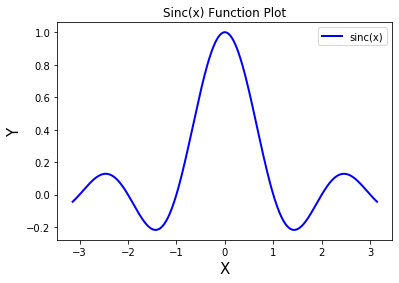

In [60]:
X_SINC = np.linspace(-np.pi,np.pi,400).reshape(400,1)
T_SINC = np.sinc(X_SINC).reshape(400,1)
TRAIN_SINC = np.array([X_SINC, T_SINC])
TRAIN_SINC = np.hstack((X_SINC, T_SINC))
plt.figure()
plt.plot(TRAIN_SINC[:,0], TRAIN_SINC[:,1], 'b-', linestyle='-', linewidth=2, label='sinc(x)')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title('Sinc(x) Function Plot')
plt.legend()
plt.show()

In [61]:
# Define a sample model to be trained on the data
SOM_M = 1
SOM_N = 40
SOM_SINC = SOMLayer(SOM_M, SOM_N, TRAIN_SINC.shape[1])

print('>>>>>> Self-Organizing Map Architecture <<<<<<')
print('MAP NODES: {}x{}'.format(SOM_M, SOM_N))
print("WEIGHTS PER NODE: {}".format(TRAIN_SINC.shape[1]))

>>>>>> Self-Organizing Map Architecture <<<<<<
MAP NODES: 1x40
WEIGHTS PER NODE: 2


Starting Training
ITERATION: 0


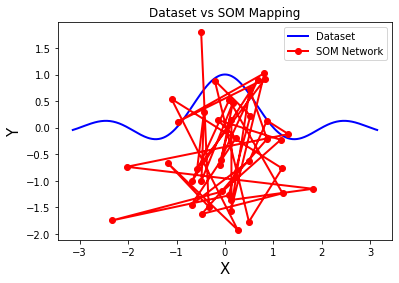

ITERATION: 0 WEIGHTS UPDATE: 0.23418576528974694
ITERATION: 100


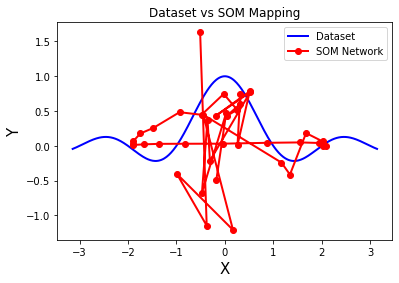

ITERATION: 100 WEIGHTS UPDATE: 0.9248199132019266
ITERATION: 200


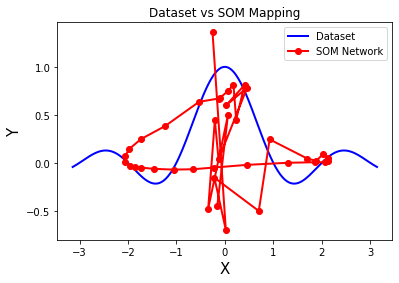

ITERATION: 200 WEIGHTS UPDATE: 0.25083640880236885
ITERATION: 300


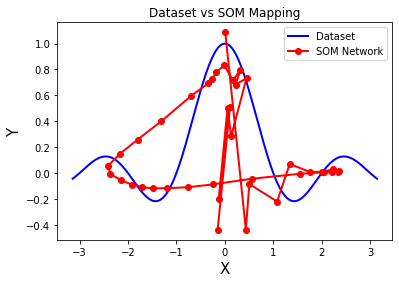

ITERATION: 300 WEIGHTS UPDATE: 0.1417719549419969
ITERATION: 400


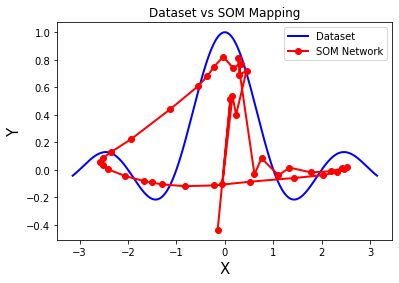

ITERATION: 400 WEIGHTS UPDATE: 0.17853483540899556
ITERATION: 500


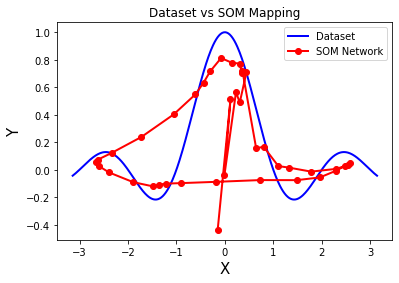

ITERATION: 500 WEIGHTS UPDATE: 0.03559872215245494
ITERATION: 600


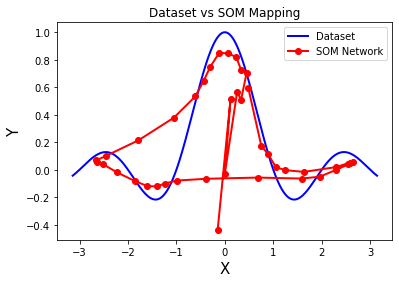

ITERATION: 600 WEIGHTS UPDATE: 0.007696296845219016
ITERATION: 700


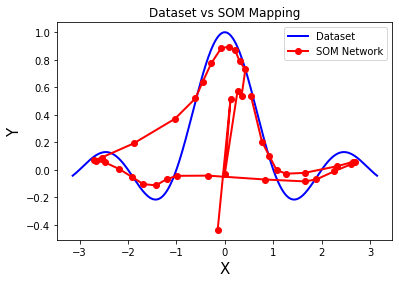

ITERATION: 700 WEIGHTS UPDATE: 0.02613956866275195
ITERATION: 800


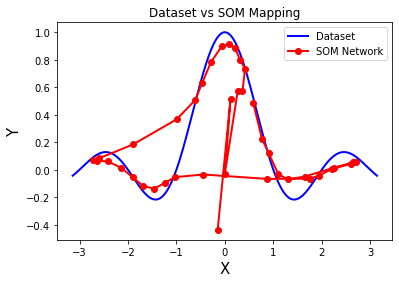

ITERATION: 800 WEIGHTS UPDATE: 0.03220851751455678
ITERATION: 900


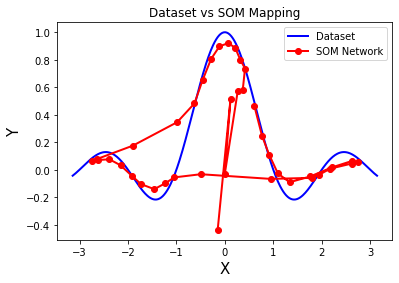

ITERATION: 900 WEIGHTS UPDATE: 0.02970339227161789
MAX NUMBER OF ITERATIONS REACHED!
OVERALL TIME FOR TRAINING: 0.0h:0.0m:2.20168s


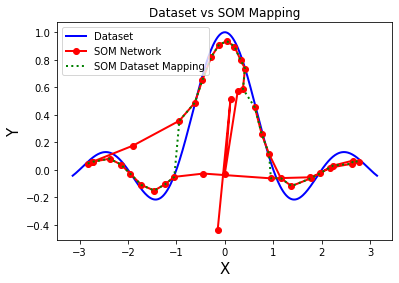

In [62]:
# TRAIN
MAX_NB_ITRS = 1000 # Max number of clusters-center updates
LEARNING_RATE_0 = 0.1

SOM_SINC, SOM_NET, SOM_X_MAP, time_t = train_network_SOM(SOM_SINC, TRAIN_SINC, verbose = True)
plot_SOM(SOM_NET, TRAIN_SINC, time_t, SOM_X_MAP, x_map_plot = True)

## SOM CIRCLE MAPPING

In [65]:
from scipy.special import gamma, gammaincc, exp1
def inc_gamma(A, x):
    if np.isscalar(A):
        out = exp1(x) if A == 0 else gamma(A)*gammaincc(A, x)
    elif A.ndim == 1:
        out = np.zeros(A.shape)
        for idx_el, el in enumerate(A):
            out[idx_el] = exp1(x) if el == 0 else gamma(el)*gammaincc(el, x)
    elif A.ndim == 2:
        out = np.zeros(A.shape)
        for idx_r, row in enumerate(A):
            for idx_el, el in enumerate(row):
                out[idx_r][idx_el] = exp1(x) if el == 0 else gamma(el)*gammaincc(el, x)
    else:
        raise ValueError("HIGHER DIMENSION(ndim = {}) IMPLEMENTATION NEEDED!!!".format(A.ndim))
    return out

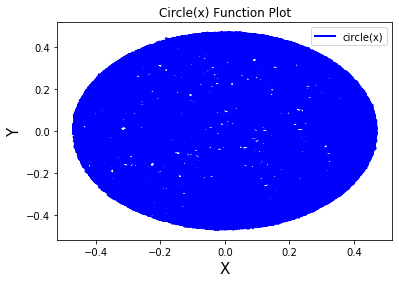

In [69]:
X_CIRCLE = np.random.randn(800,2)*0.1
S2_CIRCLE = np.sum(X_CIRCLE**2, axis=1).reshape(800,1)
TRAIN_CIRCLE = X_CIRCLE * matlib.repmat(np.sqrt(inc_gamma(S2_CIRCLE/2,1)) / np.sqrt(S2_CIRCLE),1,2)
plt.figure()
plt.plot(TRAIN_CIRCLE[:,0], TRAIN_CIRCLE[:,1], 'b-', linestyle='-', linewidth=2, label='circle(x)')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title('Circle(x) Function Plot')
plt.legend()
plt.show()

In [70]:
# Define a sample model to be trained on the data
SOM_M = 8
SOM_N = 8
SOM_CIRCLE = SOMLayer(SOM_M, SOM_N, TRAIN_CIRCLE.shape[1])

print('>>>>>> Self-Organizing Map Architecture <<<<<<')
print('MAP NODES: {}x{}'.format(SOM_M, SOM_N))
print("WEIGHTS PER NODE: {}".format(TRAIN_CIRCLE.shape[1]))

>>>>>> Self-Organizing Map Architecture <<<<<<
MAP NODES: 8x8
WEIGHTS PER NODE: 2


Starting Training
ITERATION: 0


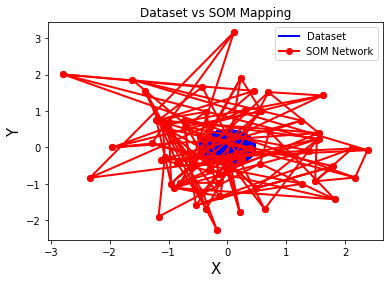

ITERATION: 0 WEIGHTS UPDATE: 1.241012179206167
ITERATION: 100


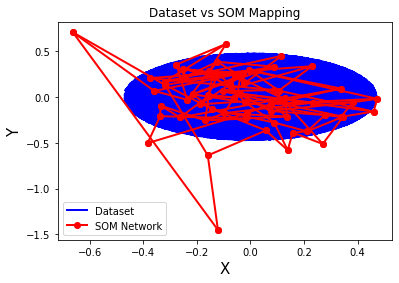

ITERATION: 100 WEIGHTS UPDATE: 0.24163371566963082
ITERATION: 200


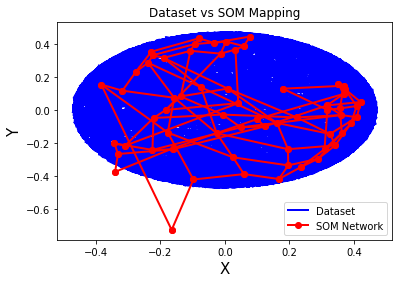

ITERATION: 200 WEIGHTS UPDATE: 0.07306438576903279
ITERATION: 300


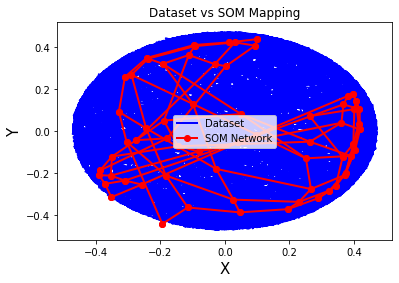

ITERATION: 300 WEIGHTS UPDATE: 0.12782024987814664
ITERATION: 400


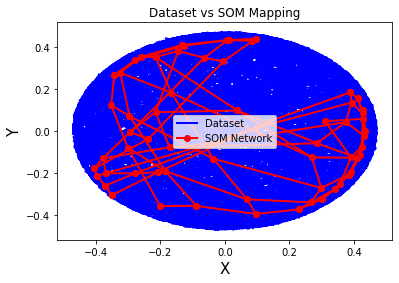

ITERATION: 400 WEIGHTS UPDATE: 0.09610393954225543
ITERATION: 500


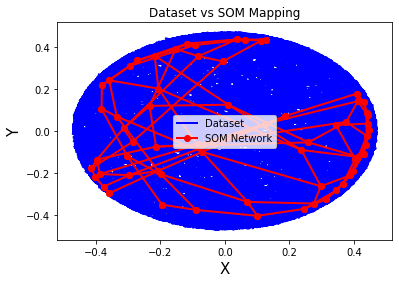

ITERATION: 500 WEIGHTS UPDATE: 0.039329146038542276
ITERATION: 600


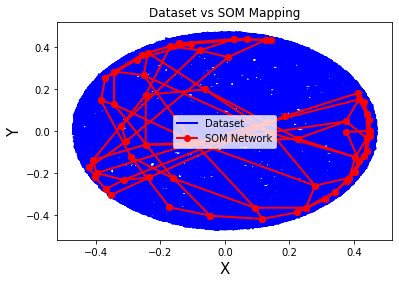

ITERATION: 600 WEIGHTS UPDATE: 0.0325916235778385
ITERATION: 700


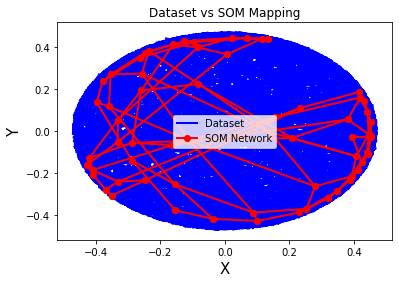

ITERATION: 700 WEIGHTS UPDATE: 0.0013450921283064375
ITERATION: 800


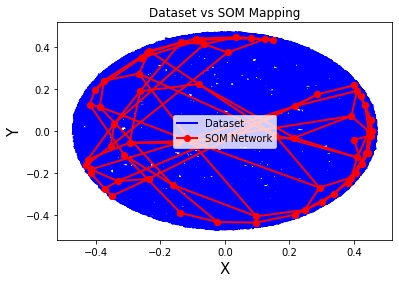

ITERATION: 800 WEIGHTS UPDATE: 0.028518254304969223
ITERATION: 900


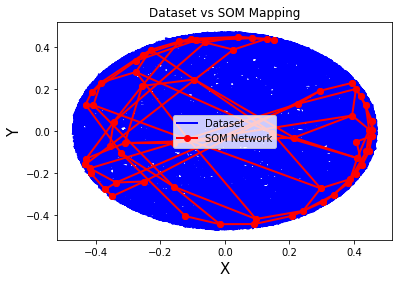

ITERATION: 900 WEIGHTS UPDATE: 0.011092999362226852
MAX NUMBER OF ITERATIONS REACHED!
OVERALL TIME FOR TRAINING: 0.0h:0.0m:6.55430s


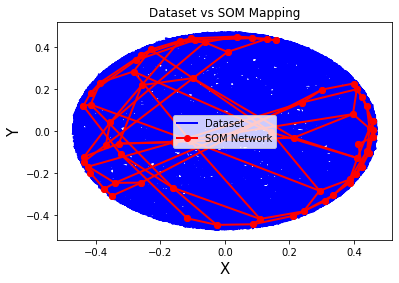

In [71]:
# TRAIN
MAX_NB_ITRS = 1000 # Max number of clusters-center updates
LEARNING_RATE_0 = 0.1

SOM_CIRCLE, SOM_NET, SOM_X_MAP, time_t = train_network_SOM(SOM_CIRCLE, TRAIN_CIRCLE, verbose=True)
plot_SOM(SOM_NET, TRAIN_CIRCLE, time_t, SOM_X_MAP, x_map_plot = False)

## SOM CIRCLE MAPPING

In [72]:
def get_accuracy(targets, predictions):
    """Helper Function for calculating the (%) accuracy of 'predictions' compared to 'targets'."""
    return ((targets - predictions) == 0 ).mean() * 100.0

In [75]:
DIGITS_DATASET_DICT = scipy.io.loadmat('Digits.mat')
X_TRAIN = np.array(DIGITS_DATASET_DICT["train_data"]).T
T_TRAIN = np.array(DIGITS_DATASET_DICT["train_classlabel"]).T
T_TRAIN = T_TRAIN.reshape(T_TRAIN.shape[0])
X_TEST = np.array(DIGITS_DATASET_DICT["test_data"]).T
T_TEST = np.array(DIGITS_DATASET_DICT["test_classlabel"]).T
T_TEST = T_TEST.reshape(T_TEST.shape[0])
DIGITS_DATASET = np.column_stack((np.vstack((X_TRAIN, X_TEST)),np.hstack((T_TRAIN, T_TEST))))
print(">>>>>> DIGITS DATASET FEATURE SPACE <<<<<<")
print(">>> FULL <<<")
print(np.array(DIGITS_DATASET).shape)
print(">>> TRAIN <<<")
print(X_TRAIN.shape)
print(T_TRAIN.shape)
print(">>> TEST <<<")
print(X_TEST.shape)
print(T_TEST.shape)

>>>>>> DIGITS DATASET FEATURE SPACE <<<<<<
>>> FULL <<<
(1100, 785)
>>> TRAIN <<<
(1000, 784)
(1000,)
>>> TEST <<<
(100, 784)
(100,)


In [76]:
# TRAIN DATASET REMOVING DIGITS 2, 3
X_TRAIN_AUG = np.copy(X_TRAIN)
T_TRAIN_AUG = np.copy(T_TRAIN)
# Setting all samples from class (2,3) to (11)
X_TRAIN_AUG[T_TRAIN == 2] = 11
X_TRAIN_AUG[T_TRAIN == 3] = 11
T_TRAIN_AUG[T_TRAIN == 2] = 11
T_TRAIN_AUG[T_TRAIN == 3] = 11
# Removing all samples from class (2,3)
X_TRAIN_AUG = X_TRAIN_AUG[~np.all(X_TRAIN_AUG == 11, axis=1)]
T_TRAIN_AUG = T_TRAIN_AUG[~(T_TRAIN_AUG == 11)]

#TEST DATASET REMOVING DIGITS 2, 3
X_TEST_AUG = np.copy(X_TEST)
T_TEST_AUG = np.copy(T_TEST)
# Setting all samples from class (2,3) to (11)
X_TEST_AUG[T_TEST == 2] = 11
X_TEST_AUG[T_TEST == 3] = 11
T_TEST_AUG[T_TEST == 2] = 11
T_TEST_AUG[T_TEST == 3] = 11
# Removing all samples from class (2,3)
X_TEST_AUG = X_TEST_AUG[~np.all(X_TEST_AUG == 11, axis=1)]
T_TEST_AUG = T_TEST_AUG[~(T_TEST_AUG == 11)]
print(">>>>>> DIGITS in (2,3) REMOVED <<<<<<")

>>>>>> DIGITS in (2,3) REMOVED <<<<<<


In [77]:
DIGITS_DATASET_AUG = np.column_stack((np.vstack((X_TRAIN_AUG, X_TEST_AUG)),np.hstack((T_TRAIN_AUG, T_TEST_AUG))))
TRAIN_DATASET_AUG = np.column_stack((X_TRAIN_AUG,T_TRAIN_AUG))
TEST_DATASET_AUG = np.column_stack((X_TEST_AUG, T_TEST_AUG))
print(">>>>>> AUGMENTED DIGITS DATASET FEATURE SPACE <<<<<<")
print(">>> FULL <<<")
print(DIGITS_DATASET_AUG.shape)
print(">>> TRAIN <<<")
print(X_TRAIN_AUG.shape)
print(T_TRAIN_AUG.shape)
print(TRAIN_DATASET_AUG.shape)
print(">>> TEST <<<")
print(X_TEST_AUG.shape)
print(T_TEST_AUG.shape)
print(TEST_DATASET_AUG.shape)

>>>>>> AUGMENTED DIGITS DATASET FEATURE SPACE <<<<<<
>>> FULL <<<
(660, 785)
>>> TRAIN <<<
(600, 784)
(600,)
(600, 785)
>>> TEST <<<
(60, 784)
(60,)
(60, 785)


In [78]:
# Define a sample model to be trained on the data
SOM_M = 10
SOM_N = 10
SOM_DIGITS = SOMLayer(SOM_M, SOM_N, TRAIN_DATASET_AUG.shape[1])

print('>>>>>> Self-Organizing Map Architecture <<<<<<')
print('MAP NODES: {}x{}'.format(SOM_M, SOM_N))
print("WEIGHTS PER NODE: {}".format(TRAIN_DATASET_AUG.shape[1]))

>>>>>> Self-Organizing Map Architecture <<<<<<
MAP NODES: 10x10
WEIGHTS PER NODE: 785


Starting Training
ITERATION: 0 WEIGHTS UPDATE: 61.67178115422079
ITERATION: 100 WEIGHTS UPDATE: 18.282869573194827
ITERATION: 200 WEIGHTS UPDATE: 22.30987434557456
ITERATION: 300 WEIGHTS UPDATE: 0.771460826720646
ITERATION: 400 WEIGHTS UPDATE: 16.507970777100404
ITERATION: 500 WEIGHTS UPDATE: 7.512854757499482
ITERATION: 600 WEIGHTS UPDATE: 1.0178315215633644
ITERATION: 700 WEIGHTS UPDATE: 4.31325849429085
ITERATION: 800 WEIGHTS UPDATE: 0.6513466594101438
ITERATION: 900 WEIGHTS UPDATE: 0.4392122319023561
MAX NUMBER OF ITERATIONS REACHED!


No handles with labels found to put in legend.


>>>>>> SOM BY CLOSEST IMAGE LABEL <<<<<<
OVERALL TIME FOR TRAINING: 0.0h:0.0m:4.60614s


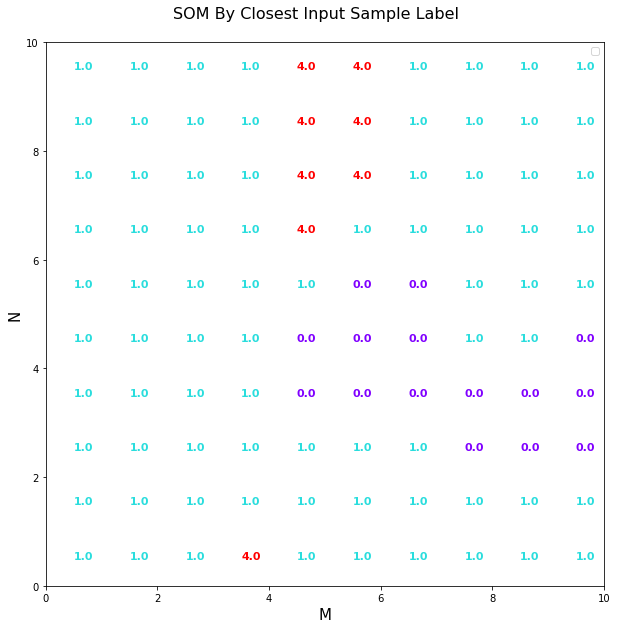

>>>>>> SOM BY CLOSEST IMAGE <<<<<<
OVERALL TIME FOR TRAINING: 0.0h:0.0m:4.60614s


No handles with labels found to put in legend.


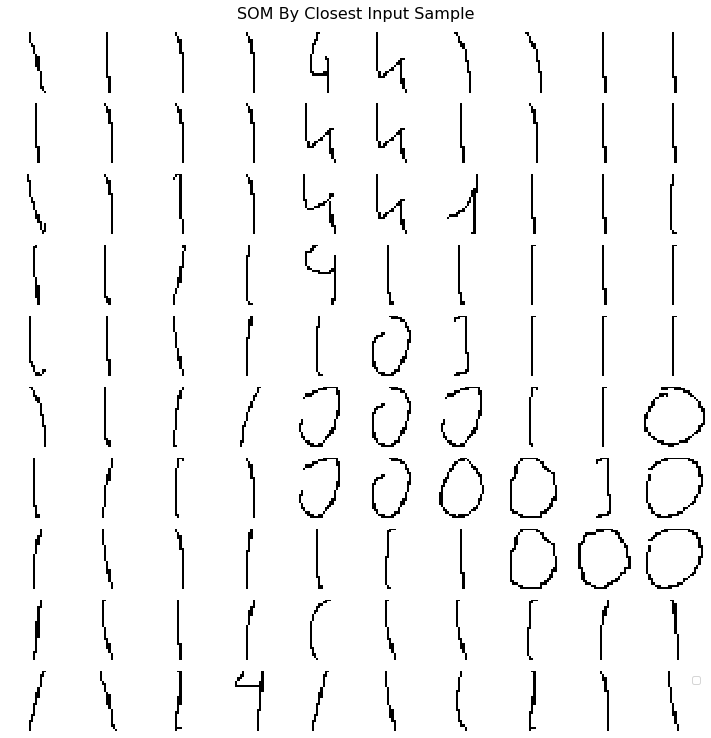

>>>>>> SOM BY NEURONS WEIGHTS <<<<<<
OVERALL TIME FOR TRAINING: 0.0h:0.0m:4.60614s


No handles with labels found to put in legend.


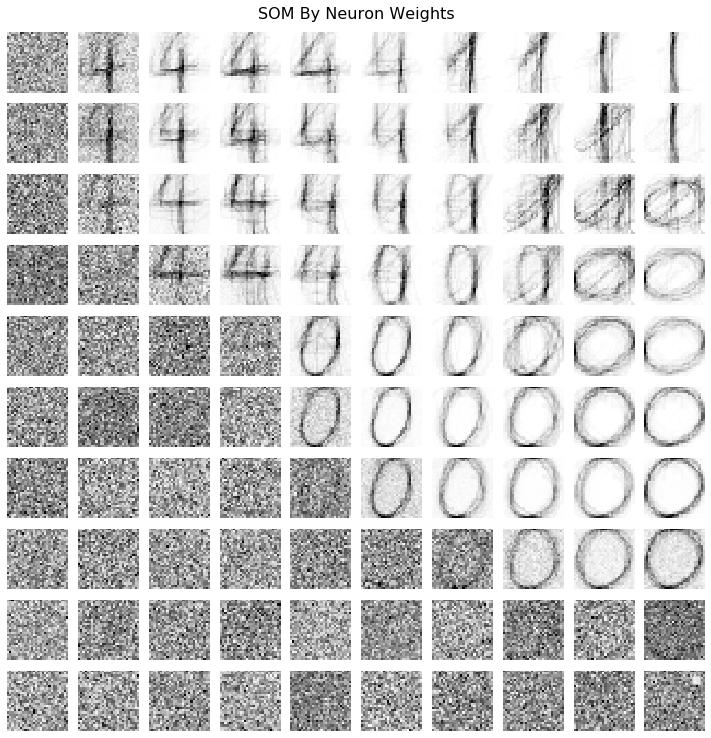

>>>>>> INPUT SAMPLES BY WINNER SOM NEURON <<<<<<
OVERALL TIME FOR TRAINING: 0.0h:0.0m:4.60614s


No handles with labels found to put in legend.


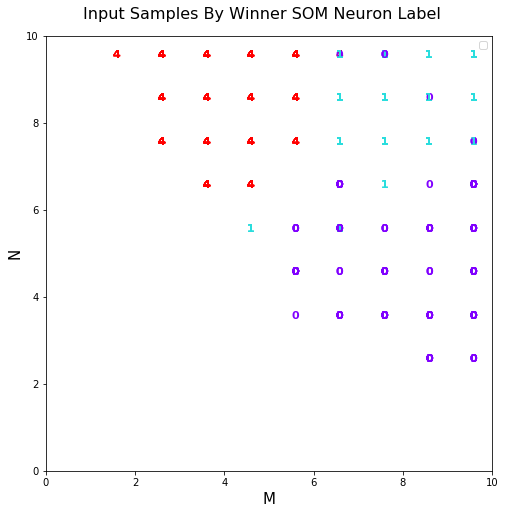

No handles with labels found to put in legend.


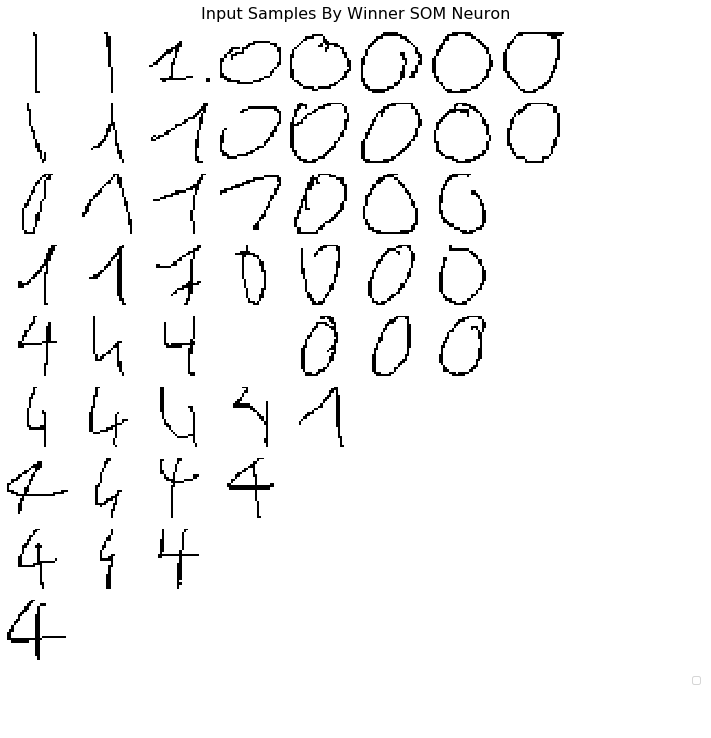

In [79]:
# TRAIN
MAX_NB_ITRS = 1000 # Max number of clusters-center updates
LEARNING_RATE_0 = 0.1

SOM_DIGITS, SOM_NET, X_MAP_TRAIN, time_t = train_network_SOM(SOM_DIGITS, TRAIN_DATASET_AUG, verbose=False)
SOM_W, W_X_SOM, W_T_SOM = SOM_DIGITS.get_winners(TRAIN_DATASET_AUG)
print(">>>>>> SOM BY CLOSEST IMAGE LABEL <<<<<<")
plot_SOM_LAB(W_T_SOM, time_t)
print(">>>>>> SOM BY CLOSEST IMAGE <<<<<<")
plot_SOM_IMG(W_X_SOM, time_t)
print(">>>>>> SOM BY NEURONS WEIGHTS <<<<<<")
plot_SOM_IMG(SOM_W, time_t, title = 'SOM By Neuron Weights', filename = 'SOM_weights_plot.png')
print(">>>>>> INPUT SAMPLES BY WINNER SOM NEURON <<<<<<")
plot_LAB_IMG_SOM(SOM_DIGITS, X_TRAIN_AUG, T_TRAIN_AUG, time_t)

In [80]:
SOM_W, X_MAP_TEST = SOM_DIGITS.get_mapping(TEST_DATASET_AUG)
accuracy_tr, accuracy_te, thrs = get_accuracy_RBFN(X_MAP_TRAIN[:,-1], X_MAP_TEST[:,-1], T_TRAIN_AUG, T_TEST_AUG)
best_thr = np.argmax(accuracy_te)
print("TRAIN ACCURACY: {:.2f}% | TEST ACCURACY: {:.2f}% | THR: {:.5f}".format(accuracy_tr[best_thr],
                                                                              accuracy_te[best_thr], thrs[best_thr]))

TRAIN ACCURACY: 64.83% | TEST ACCURACY: 66.67% | THR: 0.77662
